In [5]:
 pip install yfinance

In [6]:
import yfinance as yf
df = yf.download('BTC-USD')


[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()
df.tail()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-05-11,104106.359375,104937.992188,103364.742188,104701.070312,46285517406
2025-05-12,102812.953125,105747.453125,100814.406250,104106.960938,63250475404
2025-05-13,104169.812500,104997.421875,101515.093750,102812.492188,52608876410
2025-05-14,103539.414062,104303.562500,102618.296875,104167.328125,45956071155
2025-05-15,101819.851562,103840.859375,101809.773438,103531.726562,45664858112


In [8]:
df = df[['Close']]
df

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-05-11,104106.359375
2025-05-12,102812.953125


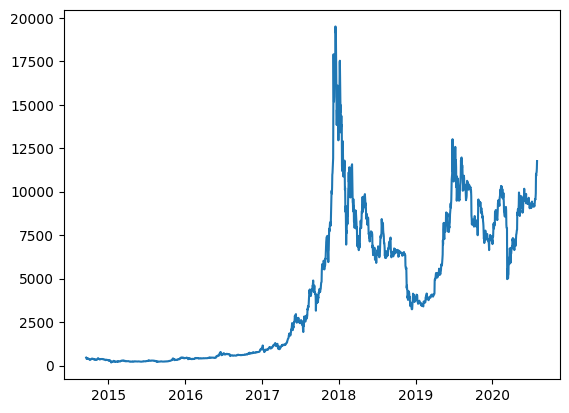

In [15]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.plot(df.index, df['Close'])
plt.show()

In [16]:
df = df[:2146]


num_training_examples = int(0.80 * len(df))
num_training_examples

training_examples = df[:num_training_examples]['Close']
test_examples = df[num_training_examples:]['Close']

test_examples

Ticker,BTC-USD
Date,
2019-05-30,8319.472656
2019-05-31,8574.501953
2019-06-01,8564.016602
2019-06-02,8742.958008
2019-06-03,8208.995117
...,...
2020-07-28,10912.823242
2020-07-29,11100.467773
2020-07-30,11111.213867


# Getting familiar with the dataset

- Training example
- start date: 2014-09-17
- end date: 2019-05-29
- number of training examples: 1716


- Test examples
- start date: 2019-05-30
- ending date: 2020-08-01
- number of testing examples: 430

In [17]:
print('training examples characteristics: \n')
print('number of training examples: ', len(training_examples))
print('start date: ', training_examples.index[0])
print('last date: ', training_examples.index[-1])

training examples characteristics: 

number of training examples:  1716
start date:  2014-09-17 00:00:00
last date:  2019-05-29 00:00:00


In [18]:
print('test examples characteristics: \n')
print('number of test examples: ', len(test_examples))
print('start date: ', test_examples.index[0])
print('last date: ', test_examples.index[-1])

test examples characteristics: 

number of test examples:  430
start date:  2019-05-30 00:00:00
last date:  2020-08-01 00:00:00


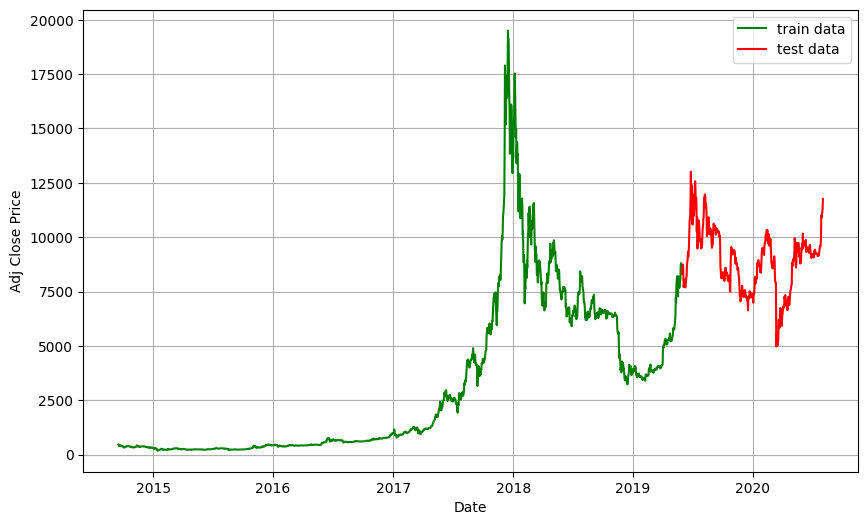

In [19]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.plot(training_examples, 'green', label='train data')
plt.plot(test_examples, 'red', label='test data')
plt.legend()

plt.show()

In [23]:
predictions = list()
history = [x for x in training_examples]
originals = list()

num_tests = len(test_examples)

print(training_examples)
# for i in range(num_tests):

#   model = ARIMA(history, order=(4, 1, 0))
#   model_fit = model.fit()
#   output = model_fit.forecast()

#   pred_value = output[0]
#   original_value = test_examples[i]
#   history.append(original_value)

#   print('predicted: ', pred_value, 'expected: ', original_value)

#   predictions.append(pred_value)
#   originals.append(original_value)





Ticker          BTC-USD
Date                   
2014-09-17   457.334015
2014-09-18   424.440002
2014-09-19   394.795990
2014-09-20   408.903992
2014-09-21   398.821014
...                 ...
2019-05-25  8052.543945
2019-05-26  8673.215820
2019-05-27  8805.778320
2019-05-28  8719.961914
2019-05-29  8659.487305

[1716 rows x 1 columns]


In [ ]:
print('history length=', len(history))
print('predictions length=', len(predictions))
print('originals length=', len(history))

history length= 2146
predictions length= 430
originals length= 2146


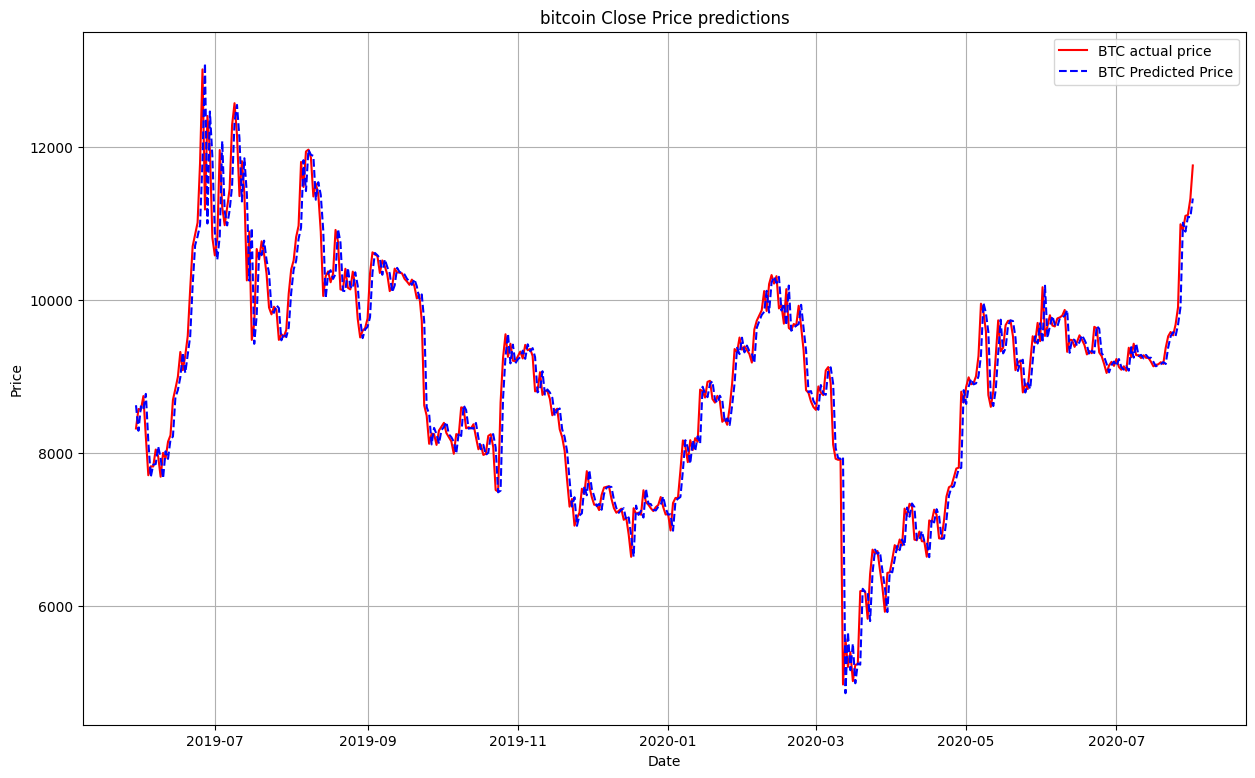

In [ ]:
# -------------------- visualizing result --------------------
plt.figure(figsize=(15, 9))
plt.grid(True)
date_range = df[num_training_examples:].index

plt.plot(date_range, originals, color='red', label='BTC actual price')
plt.plot(date_range, predictions, color = 'blue', linestyle='dashed', label='BTC Predicted Price')

plt.title('bitcoin Close Price predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse


def calculate_mape(actual, predicted) -> float:

    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)


mse = mean_squared_error(originals, predictions)
mae = mean_absolute_error(originals, predictions)
r_mse = rmse(originals, predictions)

print('MSE=', mse)
print('MAE=', mae)
print('RMSE=', r_mse)
print('MAPE=', calculate_mape(originals, predictions))


MSE= 132749.75181284643
MAE= 228.06114753843553
RMSE= 364.3483934544606
MAPE= 2.59
